<a href="https://colab.research.google.com/github/neuroqudit/pykoppu/blob/main/notebooks/01_hello_opu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KOPPU: System Pulse Check

This notebook serves as a basic sanity check for the KOPPU system. It instantiates an OPU, connects the Brian2 driver, and runs a simple simulation to verify that the digital twin is responsive and producing neural activity.

## 1. Setup & Initialization

First, we import the necessary libraries and initialize the Optical Processing Unit (OPU). We also connect a driver (in this case, the CPU backend) to interface with the OPU.

In [1]:
!pip install pykoppu==0.2.34a0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 683.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.9 MB/s eta 0:00:00


In [2]:
import pykoppu as pk
import numpy as np

# 1. Setup OPU & Driver
print("Initializing OPU...")
opu = pk.opu.OPU(capacity=50)
driver = pk.electrophysiology.connect("cpu", opu)

Initializing OPU...


## 2. Defining the Program

We define a simple pulse check program using the KOPPU ISA. This program allocates neurons, injects noise, runs the simulation, and reads the state.

In [3]:
# 2. Define a Simple Program (Pulse Check)
# We will inject some noise and run for a short duration.
from pykoppu.biocompiler.isa import Instruction, OpCode

program = [
    Instruction(OpCode.ALC, [50]),       # Allocate 50 neurons
    Instruction(OpCode.SIG, [2.0]),      # Set noise level to 2.0 mV
    Instruction(OpCode.RUN, [0.5]),      # Run for 500ms
    Instruction(OpCode.RD, [])           # Read state
]

## 3. Execution

We execute the program on the OPU via the driver. The `execute` method returns the final state, energy history, and spike data.

In [4]:
# 3. Execute Manually
print("Executing Pulse Check...")
driver.connect()
try:
    # Execute returns (state, energy, spikes)
    final_state, energy_trace, spike_data = driver.execute(program)
finally:
    driver.disconnect()

Executing Pulse Check...


## 4. Visualization

Finally, we wrap the results in a `SimulationResult` object and visualize the dynamics.

System Pulse Check Complete.


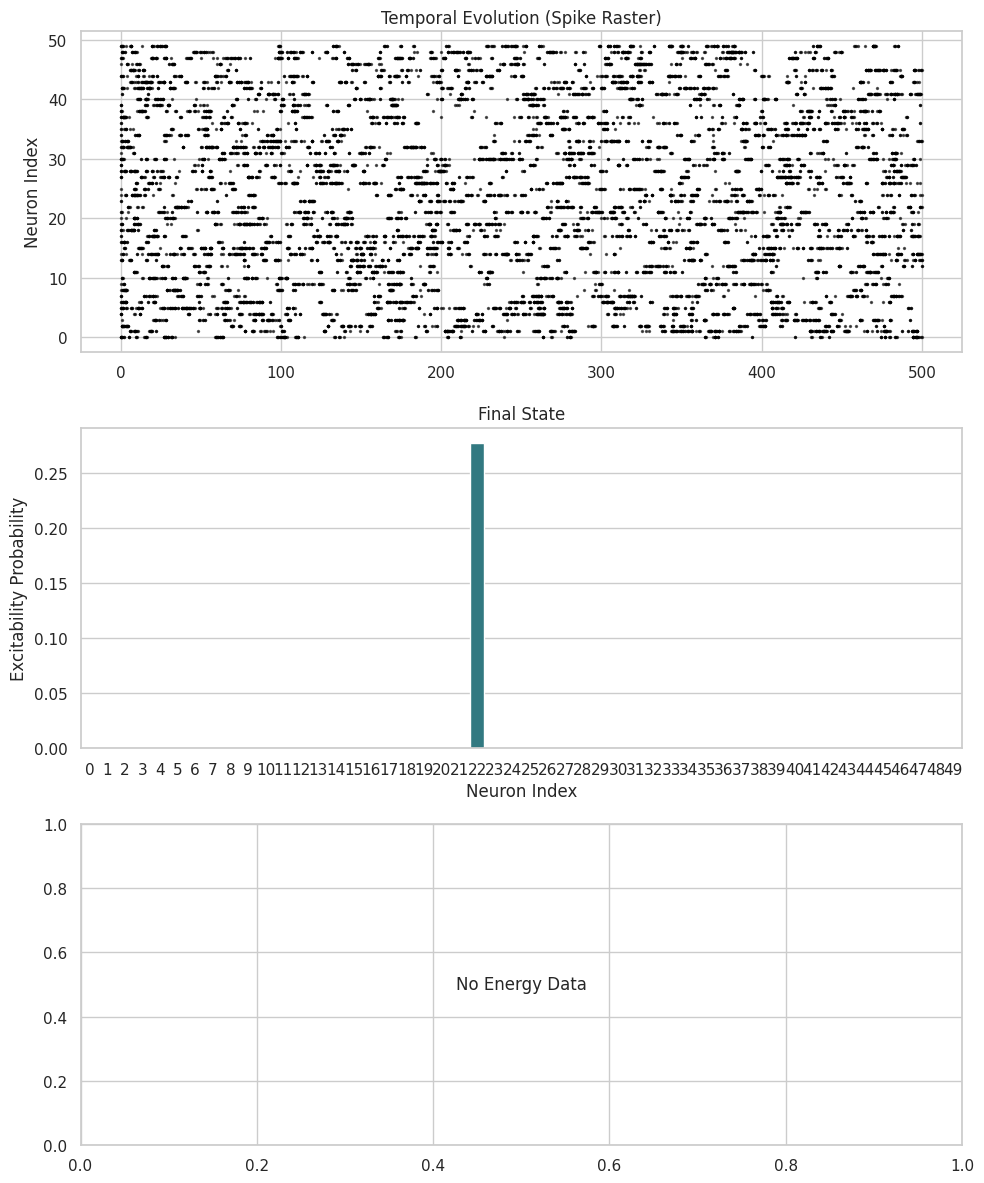

In [5]:
# 4. Visualize Results
print("System Pulse Check Complete.")

# Wrap in SimulationResult for visualization
from pykoppu.oos.result import SimulationResult

result = SimulationResult(
    solution=final_state,
    energy_history=energy_trace,
    spikes=spike_data,
    metadata={"description": "System Pulse Check"}
)

result.plot()